# Assignment 01: Supervised learning, linear models, and loss functions [100 points]

In this assignment, you're going to hard code OLS and LAD cost functions to fit regression lines to a data set. For hint, refer to the lecture slides and follow the same structure for your coding, functions etc.

## Data set
`Assignment_1_data.csv` represents the marks, number of courses taken, and study time of 100 students.

## Caveat
Once you are done, please do the following steps:

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1 and 2 until your notebook runs errors free.

4.  Submit your completed notebook to OWL by the deadline.

5. Do not clear the answer outputs of your cells. When we open your notebooks for grading the outputs must be there, else marks will be deducted.

## Toolbox

In [1]:
# Import all the necessary packages:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import scipy.optimize as so
from IPython.display import display
%matplotlib inline

---
## Part 1
### Question 1.1 [14 points]


Read the `Assignment_1_data.csv` file as a `pandas.DataFrame`. Use appropriate pandas commands to show the descriptive statistics of the dataset as well as its first 10 rows.

In [2]:
# 6 points
# YOUR CODE HERE:
students = pd.read_csv('Assignment_1_data.csv')
students.head(10)

,number_courses,Marks,time_study
0,3,19.202,13.524
1,4,7.734,0.384
2,4,13.811,12.532
3,6,53.018,47.454
4,8,55.299,62.488
5,6,17.822,19.266
6,3,29.889,18.189
7,5,17.264,17.065
8,4,20.348,17.640
9,3,30.862,18.519


Add a new column to the dataframe and name it as "time_study_avg". Divide each student's "time_study" by his/her "number_courses" to calculate this new attribute. Then, drop the original "time_study" column as we do not need it anymore.

In [3]:
# 2 pts
# YOUR CODE HERE:

# Add new column to students
students['time_study_avg'] = students['time_study'] / students['number_courses']

# Remove time_study column
students = students.drop('time_study', axis=1)

Compute the Pearson’s Correlation Coefficient between study time per course and marks. Then Investigate the relationship between the students' study time and marks by plotting a scatter plot of the `time_study_avg` (x axis) and `Marks` columns (y axis). Add an `alpha` (transparency of the plotted dots) in case some data are overlapping. Remember to label the axes.

PCC between time_study_avg and Marks: 0.942253890364054


Text(0, 0.5, 'Marks')

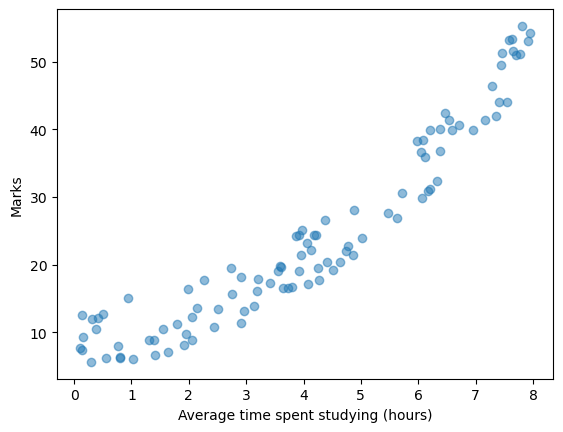

In [4]:
# 4 points
# YOUR CODE HERE:

# Pearson's Correlation Coefficient between: time_study_avg and Marks
pearson_corr = ss.pearsonr(students['time_study_avg'], students['Marks']) # this can also be calculated using pandas .corr() methods

# Print Pearson's Correlation Coefficient
print('PCC between time_study_avg and Marks:', pearson_corr[0])

# Scatter plot of time_study_avg (x) and Marks (y), with alpha = 0.5 for transparency
plt.scatter(students['time_study_avg'], students['Marks'], alpha=0.5)

# Label the axes
plt.xlabel('Average time spent studying (hours)')
plt.ylabel('Marks')

**Written question:** What do you see here? Discuss your findings. [2 points]

<font color='yellow'>**Written answer:**

There is a significant positive correlation between the average time a student spends studying
and their marks in the courses they took. This is evident through both the Pearson's Correlation
Coefficient of ~0.94, and the scatter plot showing a positive correlation between time_study_avg
and Marks.</font>

---
### Question 1.2 [4 point]

Recall that the linear model, we obtain predictions by computing

$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```

Call your function using these values.

Report $\hat{\mathbf{y}}$.

What is the dimensionality of the numpy-array that you get back?

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [5]:
# 4pt
# YOUR CODE HERE:

def linearModelPredict(b,X):
    # complete it...
    yp = X@b
    return yp

# Test
X = np.array([[1, 0], [1, -1], [1, 2]])
b = np.array([0.1, 0.3])

# Gets the prediction of y (y hat)
yp = linearModelPredict(b,X)

print('Prediction:', yp)
print('Dimensionality of prediction:', yp.shape)

Prediction: [ 0.1 -0.2  0.7]
Dimensionality of prediction: (3,)


In [6]:
# Note that b can either be a 2d array or a 1d array and the multiplication will still work
# This requires you to be cognizant about shapes and keep track of the dimension.
# Here are some examples

# b is a 2d array
print('Using a 2d array...')
X = np.eye(2)
b = 2*np.ones(2).reshape(-1,1)

print("X looks like:\n", X)
print("b looks like:\n", b)
#Note, the result of this multiplication is a 2d array
print("X@b is \n ", linearModelPredict(b,X))


# b is a 1d array
print('\n\nUsing a 1d array...')
X = np.eye(2)
b = 2*np.ones(2)

print("X looks like:\n", X)
print("b looks like:\n", b)
#Note, the result of this multiplication is a 1d array
print("X@b is \n ", linearModelPredict(b,X))

Using a 2d array...
X looks like:
 [[1. 0.]
 [0. 1.]]
b looks like:
 [[2.]
 [2.]]
X@b is 
  [[2.]
 [2.]]


Using a 1d array...
X looks like:
 [[1. 0.]
 [0. 1.]]
b looks like:
 [2. 2.]
X@b is 
  [2. 2.]


---
### Question 1.3 [10 points]

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with these values:

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
```

It must return:

`RSS of 2.06`

Gradient of `[-3.6 -4. ]`


In [7]:
# 8 pts
# YOUR CODE HERE:
def linearModelLossRSS(b, X, y):
    # complete it...
    yp = linearModelPredict(b, X)
    rss = np.sum((y - yp)**2)
    gradient = -2 * X.T @ (y - yp)

    return rss, gradient

X = np.array([[1, 0], [1, -1], [1, 2]])
b = np.array([0.1, 0.3])
y = np.array([0, 0.4, 2])

rss, gradient = linearModelLossRSS(b, X, y)
print('RSS:', rss)
print('Gradient:', gradient)

RSS: 2.06
Gradient: [-3.6 -4. ]


**Written question:** To minimize the loss, do you need increase or decrease the value of the parameters? [2 points]


<font color='yellow'>**Written answer:**

To minimize the loss, you need to optimize the loss function. In this case, it is evident
that we will need to increase the value of the parameters because the gradients are negative relative to them. To find the exact values
of the parameters that minimize the loss function, we will need to optimize it in
Question 1.4. Question 1.4 demonstrates below that the ideal values are [0.6, 0.6]</font>

---
### Question 1.4 [12 points]

Now that you've implemented a loss function in question 1.3, it is now time to minimize it.

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2.

Test the function with these values:
```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2])
```
It must return:

Betas: `[0.6 0.6]`

R2: `0.75`


**Hint**: Use `scipy.optimize.minimize` (refer to the slides) to minimize the loss function



In [8]:
# 12 pts
# YOUR CODE HERE:
def linearModelFit(X, y, lossfcn):
    # Returns the estimated betas and the R2 value
    bstart = np.zeros(X.shape[1]) # initial betas of 0 for dimensionality of X
    res = so.minimize(lossfcn, bstart, args=(X, y), jac=True)
    b = res.x
    yp = linearModelPredict(b, X)
    r2 = 1 - np.sum((y - yp)**2) / np.sum((y - np.mean(y))**2)
    return b, r2

X = np.array([[1, 0], [1, -1], [1, 2]])
y = np.array([0, 0.4, 2])

b, r2 = linearModelFit(X, y, linearModelLossRSS)
print('Betas:', b)
print('R2:', r2)

Betas: [0.6 0.6]
R2: 0.75


---
### Question 1.5 [14 points]

Use the above functions to fit your model to the given dataset. Then use your model and the fitted parameters to make predictions along a grid of equally spaced students' study time. You can get these by generating a new X-matrix with 100 equally space time_study_avgs (using for example [```np.linspace```](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Plot the data and add a line for the predicted values. Also report the $R^2$ value for the fit. You can do this by either printing out the $R^2$ of the fit or putting it on your plot via the built-in `annotate` function of `matplotlib`.


Text(0.05, 0.95, 'R2 = 0.8859911634514204')

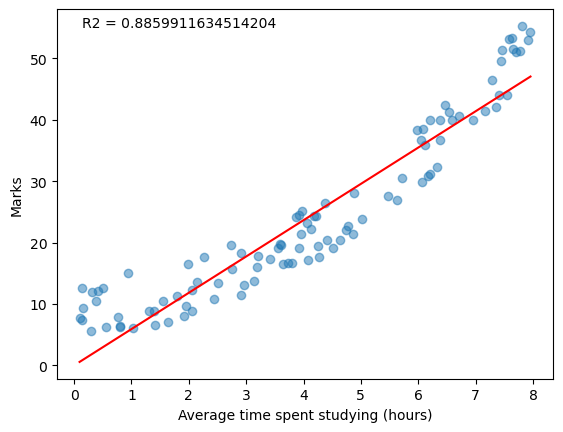

In [9]:
# 14 pts
# YOUR CODE HERE:
# Fit the model to students - input is time_study_avg and output is Marks
X = students['time_study_avg'].values.reshape(-1, 1)
y = students['Marks'].values
b, r2 = linearModelFit(X, y, linearModelLossRSS)

# Plot the data with the linear model
plt.scatter(students['time_study_avg'], students['Marks'], alpha=0.5)
plt.xlabel('Average time spent studying (hours)')
plt.ylabel('Marks')

# Plot the linear model
x = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y = linearModelPredict(b, x)
plt.plot(x, y, 'r')

# Annotate with R2 in top left of plot
plt.annotate('R2 = {}'.format(r2), xy=(0.05, 0.95), xycoords='axes fraction')

In [10]:
# Showcase using time_study_avg and number_courses as inputs
X = students[['time_study_avg', 'number_courses']].values
y = students['Marks'].values
b, r2 = linearModelFit(X, y, linearModelLossRSS)

print('R2:', r2)

R2: 0.91558559915085


---
## Part 2: LAD Regression

---
### Question 2.1 [10 points]

In the previous section, we worked with the OLS loss.  Now, we'll implement a linear model with the least absolute deviation (LAD) loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values:

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
```
It must return:

LAD of `2.0`

Gradient of `[-1. -1.]`

In [11]:
# 10 points
# YOUR CODE HERE:
def linearModelLossLAD(b, X, y):
    yp = linearModelPredict(b, X)
    lad = np.sum(np.abs(y - yp))
    gradient = -np.sign(y - yp) @ X

    return lad, gradient

X = np.array([[1, 0], [1, -1], [1, 2]])
b = np.array([0.1, 0.3])
y = np.array([0, 0.4, 2])

lad, gradient = linearModelLossLAD(b, X, y)
print('LAD:', lad)
print('Gradient:', gradient)

LAD: 2.0
Gradient: [-1. -1.]


---
### Question 2.2: [10 points]


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of 100 equally spaced students time_study_avg.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the $R^2$-value.

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



Text(0.05, 0.95, 'R2 = 0.8852770680196714')

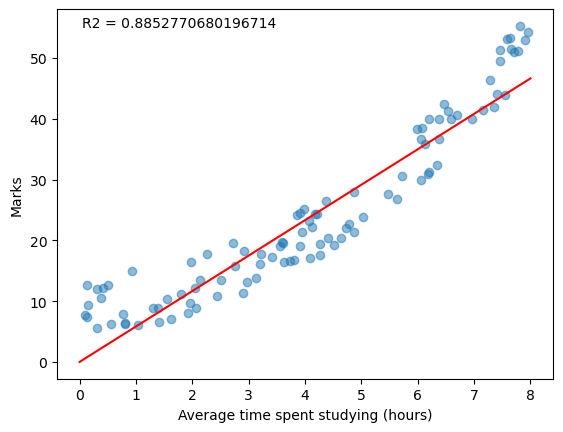

In [12]:
# 8 points
# YOUR CODE HERE:
# Fit the model to students - input is time_study_avg and output is Marks
X = students['time_study_avg'].values.reshape(-1, 1)
y = students['Marks'].values
b, r2 = linearModelFit(X, y, linearModelLossLAD)

# Plot the data with the linear model
plt.scatter(students['time_study_avg'], students['Marks'], alpha=0.5)
plt.xlabel('Average time spent studying (hours)')
plt.ylabel('Marks')

# Plot the linear model
x = np.linspace(0, 8, 100)
y = b[0] * x
plt.plot(x, y, 'r')

# Annotate with R2 in top left of plot
plt.annotate('R2 = {}'.format(r2), xy=(0.05, 0.95), xycoords='axes fraction')

In [13]:
# Showcase using time_study_avg and number_courses as inputs
X = students[['time_study_avg', 'number_courses']].values
y = students['Marks'].values
b, r2 = linearModelFit(X, y, linearModelLossLAD)

print('R2:', r2)

R2: 0.9108935491894065


**Written question**: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? How their $R^2$ values compare? Why? [2 points]

<font color='yellow'> **Written Answer:**

Observing the fit through the plots leads to a very minor difference between L1 and L2. For a quantitative description, the R2 value is evidently better
in the L2 cost function over the L1 cost function. The R2 value will always be better for OLS because it is miming the RSS. The L1 model will likely perform better if there are significant outliers using median regression robust techniques, but in this case they are very similar.
</font>

---
### Question 2.3: [12 points]

Fit an OLS model to all student data with the `linear_model` module from the `sklearn` package by using the [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class. The features (i.e., predictors) to use are average study time, and number of courses.

In [14]:
# 8 points
# YOUR CODE HERE:
from sklearn.linear_model import LinearRegression

# Fit the model to students - input is time_study_avg and output is Marks
X = students[['time_study_avg', 'number_courses']].values
y = students['Marks'].values
reg = LinearRegression().fit(X, y)
r2 = reg.score(X, y)

print('R2 for time_study_avg + number_courses: {:f}'.format(r2))

# Showcase if we only use time_study_avg
X = students[['time_study_avg']].values.reshape(-1, 1)
y = students['Marks'].values
reg = LinearRegression().fit(X, y)
r2 = reg.score(X, y)

print('R2 for only time_study_avg: {:f}'.format(r2))


R2 for time_study_avg + number_courses: 0.940366
R2 for only time_study_avg: 0.887842


In no more than two sentences, comment on the $R^2$ values from your `sklearn` model and previous models. Are they similar? [4 pts]

<font color='yellow'> **Written Answer:**

The R2 value for the SKLearn model is similar to the previous models but slightly higher, leading to a better correlation between the input and the output. The ~0.94 value from the SKLearn model is similar to the values of ~0.92 and ~0.91 from the OLS and LAD models. If we only use time_study_avg, the values are nearly equivalent with ~0.89 from the SKLearn model being similar to the values of ~0.89 and ~0.89 from the OLS and LAD models. The results conclude that it is beneficial to include the number_courses parameter in the model for a better fit.</font>

---
## Part 3: Custom loss function

---
### Question 3.1: [4 points]

Assume that the following function has been proposed to you to use as a new loss function for regression:

$$L_3(\hat{\beta}) = \sum_{i=1}^{n} ({y_i-\hat{y_i}})^3$$

What do you think about this new loss function, would you accept it? Please, explain.


<font color='yellow'>**Written answer:**

This new loss function would introduce overfitting. This will be a very non-robust method for a loss function because a single outlier will be heavily considered in the loss function and will lead to a model that does not generalize well. The same would apply if we continued to increase the exponent to 4, 5, ...
</font>


---
### Question 3.2: [10 points]

Regardless of your answer to Question 4.1, taking $\: \hat{\mathbf{y}} = \mathbf{X.^2} \hat{\beta}\:$ as your functional form for regression (note that $\mathbf{X.^2}$ implies element-wise power), use your knowledge of calculus to calculate the gradient of $\: L_3(\hat{\beta}).$ Type your answer (including the intermediate steps) in the cell below in Latex format. Note that $\hat{\beta}=[\beta_0, \beta_1]^T$, and $\mathbf{X}$ is an $n$-by-$2$ matrix.

<font color='yellow'>**Written answer:**

$ L_3(\hat\beta) = \sum_{i = 1}^{n}(y_i - \hat y_i)^3 = \sum_{i = 1}^{n}(y_i - \beta_0 - \beta_1x_i)^3$

$ \nabla L_3(\hat\beta): $

$ \frac{\partial}{\partial \beta_1} ((y_i - \beta_0 - \beta_1x_i)^3) = \frac{\partial}{\partial \beta_1} ((y_i - \beta_0 - \beta_1x_i)^2(y_i - \beta_0 - \beta_1x_i))$

OLS States:
$ \frac{\partial}{\partial \beta_1} ((y_i - \beta_0 - \beta_1x_i)^2) = -2(y_i - \beta_0 - \beta_1x_i)(-x_i) $

For $ L_3 $
by chain rule, $ \frac{\partial}{\partial \beta_1} ((y_i - \beta_0 - \beta_1x_i)^2(y_i - \beta_o - \beta_1x_i)) = -3(y_i - \beta_0 - \beta_1x_i)^2x_i $

Therefore, $ \frac{\partial}{\partial \beta_1} = -3 \sum_{i = 1}^{n} (y_i - \beta_0 - \beta_1x_i)^2x_i = -3\sum_{i = 1}^{n}r_i^2x_i,~~~ r_i = y_i - \beta_0 - \beta_1x_i $

$ \frac{\partial}{\partial \beta_0} ((y_i - \beta_o - \beta_1x_i)^3) = \frac{\partial}{\partial \beta_1} ((y_i - \beta_o - \beta_1x_i)^2(y_i - \beta_o - \beta_1x_i))$

OLS States:
$ \frac{\partial}{\partial \beta_0} ((y_i - \beta_0 - \beta_1x_i)^2) = 2(y_i - \beta_0 - \beta_1x_i)(-1) $

For $ L_3 $
by chain rule, $ \frac{\partial}{\partial \beta_0} ((y_i - b_0 - \beta_1x_i)^2(y_i - \beta_0 - \beta_1x_i)) = -3(y_i - \beta_0 - \beta_1x_i)^2 $

Therefore, $ \frac{\partial}{\partial \beta_0} = -3 \sum_{i = 1}^{n} (y_i - \beta_0 - \beta_1x_i)^2x_i = -3\sum_{i = 1}^{n}r_i^2,~~~ r_i = y_i - \beta_0 - \beta_1x_i $


$ \nabla L_3(\hat\beta) = [ \frac{\partial}{\partial \beta_0} ~~~ \frac{\partial}{\partial \beta_1} ] = [ -3\sum_{i = 1}^{n}r_i^2 ~~~-3\sum_{i = 1}^{n}r_i^2x_i ] $
</font>